In [25]:
%matplotlib inline
import numpy as np
from kungpao.display import display_single, SEG_CMAP

In [1]:
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
hdu1 = fits.open(get_pkg_data_filename('./gc_2mass_k.fits'))[0]
hdu2 = fits.open(get_pkg_data_filename('./gc_msx_e.fits'))[0]

Text(0.5,1,'MSX band E')

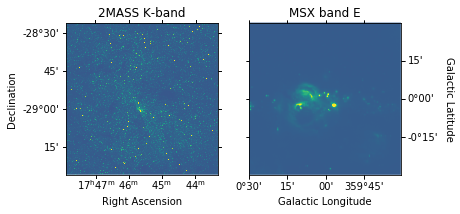

In [5]:
from astropy.wcs import WCS
import matplotlib.pyplot as plt

ax1 = plt.subplot(1,2,1, projection=WCS(hdu1.header))
ax1.imshow(hdu1.data, origin='lower', vmin=-100., vmax=2000.)
#ax1.coords.grid(color='white')
ax1.coords['ra'].set_axislabel('Right Ascension')
ax1.coords['dec'].set_axislabel('Declination')
ax1.set_title('2MASS K-band')

ax2 = plt.subplot(1,2,2, projection=WCS(hdu2.header))
ax2.imshow(hdu2.data, origin='lower', vmin=-2.e-4, vmax=5.e-4)
#ax2.coords.grid(color='white')
ax2.coords['glon'].set_axislabel('Galactic Longitude')
ax2.coords['glat'].set_axislabel('Galactic Latitude')
ax2.coords['glat'].set_axislabel_position('r')
ax2.coords['glat'].set_ticklabel_position('r')
ax2.set_title('MSX band E')

In [26]:
from reproject import reproject_interp
array, footprint = reproject_interp(hdu2, hdu1.header)

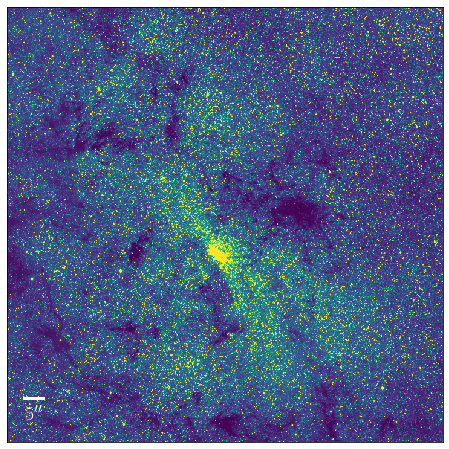

In [28]:
display_single(hdu1.data);

/Users/jiaxuanli/Research/kungpao/kungpao/display.py:142: RuntimeWarning: invalid value encountered in arcsinh
  img_scale = np.arcsinh(img)


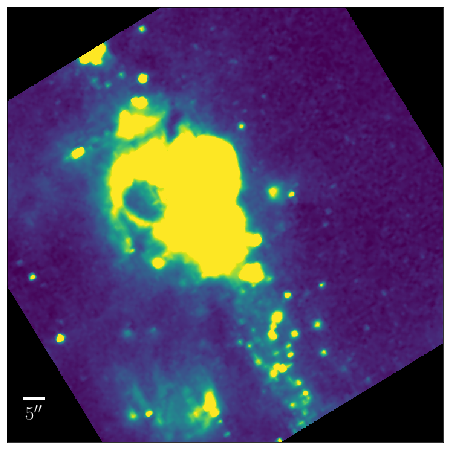

In [29]:
display_single(array);

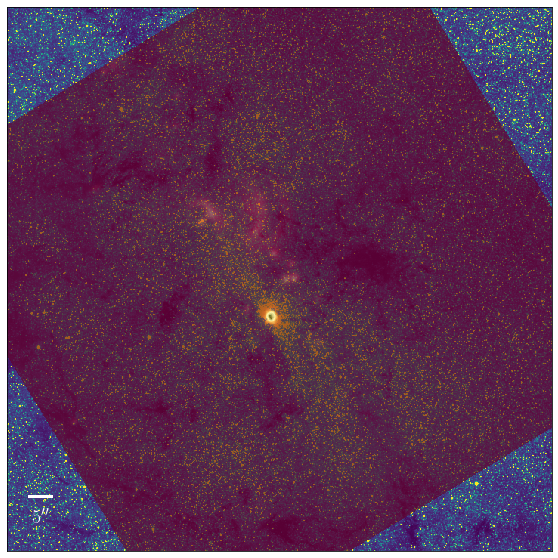

In [48]:
fig, ax = plt.subplots(figsize=(10, 10))
display_single(hdu1.data, ax=ax)
ax.imshow(array, origin='low', cmap='RdGy', alpha=0.6)

In [50]:
new_header = hdu2.header.copy()   
new_header['CTYPE1'] = 'GLON-TAN'   
new_header['CTYPE2'] = 'GLAT-TAN'  

In [60]:
array, footprint = reproject_interp(hdu2, new_header, order='bicubic')

/Users/jiaxuanli/Research/kungpao/kungpao/display.py:142: RuntimeWarning: invalid value encountered in arcsinh
  img_scale = np.arcsinh(img)


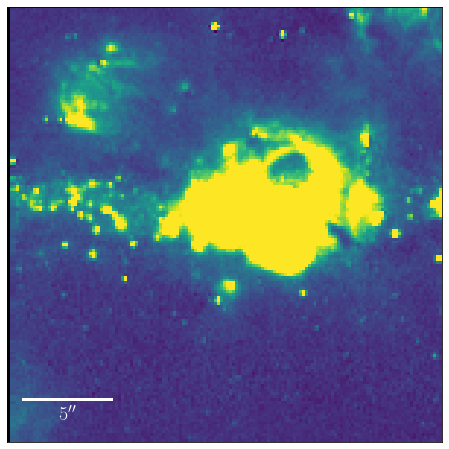

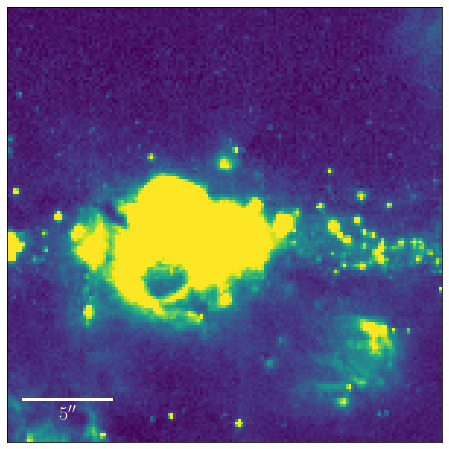

In [61]:
display_single(array);
display_single(hdu2.data);